In [2]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

# Temporal Difference Learning

Temporal difference learning illustreert de rol van tijd en geheugen in het koppelen van CS en de US. Het is een simpele uitbreiding van het Rescorla Wagner model en vormt tot op de dag van vandaag de basis van zeer sterke reinforcement learning algoritmes. Tijd is heel erg belangrijk omdat in de meeste gevallen beloningen van ons gedrag ver in de toekomst liggen. Denk bijvoorbeeld aan het spel Go. Pas aan het eind, als de winnaar bekend is gemaakt komt er een beloning. Maar we zouden niet willen zeggen dat alleen de laatste zet de winnende zet was, en dus alleen die geassocieerd moet worden met de beloning. Alle zetten hebben op een of andere manier meegeholpen aan de overwinning. Een van de grootste computationele uitdagingen is om ook deze zetten goed te associëren met de beloning. Dit heet ook wel het credit assignment problem. TD is een eerste, simpele maar krachtige zet in die richting.

Details over het TD model zijn terug te vinden in de college slides, het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6 en 12.

Het leren in deze opdracht speelt zich af in een simpel **Markov Reward Process** met de volgende structuur:

![](random_walk.png)


De robot start elke episode in $C$, en gooit dan telkens een muntje op om te bepalen welke kant hij op gaat (kop = links, munt = rechts, beiden 50% kans). Zodra de robot een van de vierkanten eindpunten bereikt is de episode over en begint de robot weer bij punt $C$. Als de robot in het rechter eindpunt eindigt krijgt hij 1 punt, alle andere beloningen zijn nul. We gaan nu dus nog niet kijken naar handelingen, maar eerst in kaart brengen hoe er een associatie kan komen tussen states and toekomstige beloningen. 

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen voor elke staat: $$V(A)=V(B)=V(C)=V(D)=V(E)= 0$$

## Het TD-model

Zoals gezegd is het TD model gebaseerd op de het RW model, met de aanpassing dat het de factor tijd kan meenemen. Er is een ander klein verschil in conventie die verwarrend kan zijn. Zo wordt de beloning in RW aangeduid met $V_{max}$, wat de maximale associatie waarde wordt genoemd. In reinforcement learning wordt deze term ge-interpreteerd als de grote van de beloning zelf, en geschreven als $r$ van $r$eward. De logica is hetzelfde, een grotere beloning zou ook volgens het RW model een groter niveau van response moeten oproepen. Dus de klassieke notatie van RW was:

$$ V_{t+1} = V_t + \alpha(V_{max} - V_t) $$

Maar in context van reinforcement learning, and TD-learning, schrijven we het zo:

$$ V_{t+1} = V_t + \alpha(r_t - V_t) $$

Dit maakt de connectie tussen RW en TD modelen als het goed is duidelijker. 

### Q1.a  (3 punten)

Waarom zou de robot met het klassieke RW model nooit leren wat de waarde is van state A? 


## Answer
Omdat het model niet de waarden van tussengelegen states uitrekent of opslaat. Mocht A gekozen als laatste element zal die ook altijd de waarde 0 hebben, omdat er geen mogelijkheid is om punten te halen en dan bij A aan te komen. De waarde van A zal dus altijd 0 zijn

### Q1.b  (4 punten)
Schrijf de TD functie op die de nieuwe waarde V uitrekent nadat de robot een stap heeft verzet. Welke vrije variabelen heeft deze functie? Denk er aan dat tijd een factor speelt (dus dat je de tijdsindicatoren t  en t+1 correct hebt staan)

## Answer
$$V(s_t) = V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]$$
Hierin zijn $\alpha$ en $\gamma$ de vrije variabelen. $\gamma$ is de discount factor voor de future rewards en $\alpha$ is de step size parameter voor de leersnelheid.


![](random_walk_reward.png)

### Q1.b (7 punten)

In het begin is de verwachte waarde van staat E nul ($V(E)=0$), nu schuift de robot voor het eerst een keer toevallig naar rechts en verdient $1$ punt. Wat is hierna de verwachte waarde $V(E)$, gegeven $\alpha = .1$ en $\gamma =1$? En voor $\alpha = 0.6$ en $γ =1$?

Met een $\alpha$ van .1: 0.1

Met een $\alpha$ van .6: 0.6

### Q1.c (9 punten)

Schrijf een functie `td_zero` die als input, alpha ($\alpha$) , gamma ($\gamma$) en het aantal episodes accepteert. De output van deze functie moet een lijst met (V)alues zijn voor elke staat (A t/m E) in de wereld van de robot na het leren van # episodes.

* initieer de staat van de wereld:
    * Er zijn 7 states (5 letters & 2 endpoints), voor alle $V_{t=0} = 0$
* Creëer een `for loop` over alle episodes
    * Elke episode begint in C
* In elke episode blijf lopen tot je een van de eindpunten bereikt
    * Gooi muntje op en maak een stap
    * Kijk wat je beloning is na maken van stap en update $V_{t}$
    * Eindpunt bereikt? Nieuwe episode, zo niet weer muntje opgooien
    
Laat me behulp van deze functie de robot 100 episodes leren over deze wereld. 
Hoe zien zijn verwachtingen er uit voor elke state (SV), gegeven $\alpha=0.1$ en $\gamma=1$? En voor $\alpha=0.6$ en $\gamma=1$? Welke is dichter bij de waarheid?


In [3]:
def td_zero(alpha, gamma, episodes):
    
    values = np.zeros((7))
    for ep in range(episodes):
        index = 3
        while not index is 0 and not index is 6:
            flip = np.random.uniform(0, 1)
            if flip > 0.50:
                nextindex = index + 1
            else:
                nextindex = index - 1
            if nextindex == 6:
                reward = 1
            else:
                reward = 0
            values[index] += alpha * (reward + gamma * values[nextindex] - values[index])
            index = nextindex
    return values

print(td_zero(0.1, 1, 100))
print(td_zero(0.6, 1, 100))

[0.         0.0862001  0.23001204 0.41398383 0.53907511 0.80278023
 0.        ]
[0.         0.02833587 0.317487   0.65693536 0.85235651 0.9475416
 0.        ]


## MSE

Nu willen we weten hoe goed deze waardes die de robot toekent overeenkomen met de werkelijke staat van de wereld. Analytisch kan men bepalen dat de verwachte waarden 

$$ V(A)=\frac{1}{6}\ ,\ V(B)=\frac{2}{6}\ ,\ V(C)=\frac{3}{6}\ ,\ V(D)=\frac{4}{6}\ ,\ V(E)=\frac{5}{6}$$

moeten zijn als de robot voor altijd in dit universum zou ronddolen. 

Net als bij de functies die we eerder geschat hebben, beoordelen we deze leeruitkomsten niet op basis van absolute verschillen maar op basis van mean squared error ($MSE$). De error is in dit geval dus het verschil tussen de verwachte waarde van een staat volgens de robot, en de analytisch-verwachte waarde. Gebruikmakende van de eerdere $MSE$ functie, kunnen we onderzoeken welke parameter waardes voor $\alpha$ en $\gamma$ het snelst het dichts bij de waarheid komen.

### Q2.a  (7 punten)

Schrijf nu een loop die de `td_zero` functie meerdere keren aanroept, elke keer met een ander aantal episodes, en bereken de $MSE$ met het analystische resultaat, zodat je de veranderingen in $MSE$ per episode kan volgen. Zo kan je verschillende leercurves met elkaar vergelijken, de robot leert elke episode de verwachte waarde van een staat beter kennen, dus de $MSE$ moet steeds kleiner worden.

Plot de leercurves voor $\alpha = 0.7$ en $\alpha = 0.1$ voor 100 episodes ($\gamma=1$) in dezelfde grafiek.  Beschrijf welk model is het beste in het begin en welke aan het eind? Waardoor komt dat? Is een hoge learning rate altijd beter? 



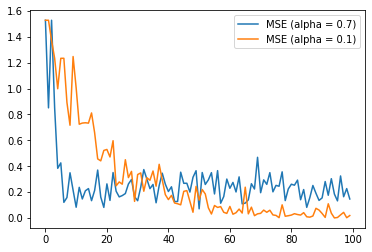

In [4]:
def MSE_td_zero(array):
    error = array - np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 0])
    error = error**2
    return np.sum(error)

epis = 100
sevalph = []
onealph = []

for i in range(epis):
    td = td_zero(0.7, 1, i)
    sevalph.append(MSE_td_zero(td))
    
for i in range(epis):
    td = td_zero(0.1, 1, i)
    onealph.append(MSE_td_zero(td))
    
plt.plot(sevalph, label='MSE (alpha = 0.7)')
plt.plot(onealph, label='MSE (alpha = 0.1)')
plt.legend()
plt.show()

# Eerst is de hogere learning rate beter, maar naarmate er meer episodes komen zien we dat een lagere
# learning rate beter presteert.

### Q2.b  (7 punten)

Plot nu de leercurves voor $\gamma=1$, en $\gamma=0.5$ voor 100 episodes ($\alpha = 0.1$).  Beschrijf hoe de leercurves lopen, en laat ook de uiteindelijke $V$ waardes voor elk model zien.  

Wat is het effect van $\gamma$? hoe ziet de robot met $\gamma=0.5$ de wereld (in psychologische termen)? In wat voor een situatie zou dat goed zijn?

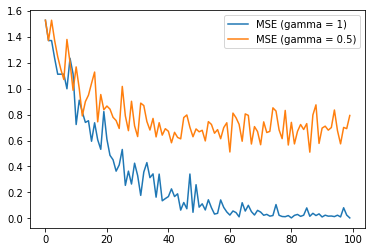

In [5]:
onegam = []
halfgam = []

epis = 100

for i in range(epis):
    td = td_zero(0.1, 1, i)
    onegam.append(MSE_td_zero(td))
    
for i in range(epis):
    td = td_zero(0.1, 0.5, i)
    halfgam.append(MSE_td_zero(td))
    
plt.plot(onegam, label='MSE (gamma = 1)')
plt.plot(halfgam, label='MSE (gamma = 0.5)')
plt.legend()
plt.show()

## Eligibility traces                                       

![](random_walk_memory.png)

Tot nu toe onthield de robot alleen waar hij een stap geleden was. Dit maakt leren nog niet heel efficient. Het kan nu nog steeds er lang duren voordat states (of later handelingen) credit krijgen terwijl ze erg dicht bij de beloning waren. Eligibility traces is een eerste stap om TD uit te breiden, en om meer states credit te geven voor de beloning. Het is wederom een zeer simpel process, maar het maakt het leren veel efficienter. 

Je kan het vorige algoritme zien alsof de robot alleen de vorige state kon onthouden.We breiden daarom nu het geheugen uit en daarmee kan hij langer dingen onthouden, en dus ook waarde toekennen aan states die langer in het verleden liggen. 

Dit gaat door middel van eligibility traces.  Elke staat die wordt bezocht komt in aanmerking voor een value update zodra er onverwachte uitkomsten zijn. Hoe langer een staat niet bezocht is des te minder deze in aanmerking komt voor een update.

Hoe snel een staat in het verleden geen credit meer krijgt (niet eligible is) wordt geregeld via de $\lambda$ parameter:

$$ e_t(s)= \begin{cases}
\gamma \lambda e_{t-1}(s) & if\ s \neq s_t\\
1 & if\ s = s_t \end{cases} $$

Net als in klassike TD krijgt de huidige staat waarde 1, en worde alle vorige states in waarde vermindert met eligibility parameter $\lambda$ en discount factor $\gamma$ (beiden getallen tussen 0 en 1).

In het nieuwe model worden dan de verwachte waarde van een alle states die eligible zijn (een $e$ >0) ge-update met de volgende regel:

$$\Delta V(s) = \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)] e(s)$$

### Q3.a  (7 punten)

Implementeer eligibility traces in het `td_zero` model, en maak er dus `td_lambda` van. Schrijf dus een nieuwe functie. Hiervoor is het nodig om:

* Voor elke episode te beginnen met een lijst met eligibility values (EV), die begint met een eligibility van 0 voor voor alle states (A-E). 
* Deze lijst moet elke stap worden bijgehouden. Elke keer als de robot in een state komt krijgt deze EV = 1, maar hoe langer de robot niet meer in die state komt des te lager de EV wordt.
* Let op! de prediction error (PE) moet nu gebruikt worden om alle states up te daten met een eligibility waarde groter dan nul.
* Zorg dat de output van de functie een lijst is van states $V$ en een lijst van eligibility waardes $e$ (een lijst per episode). 


Run de`td_lambda` functie die je net gemaakt hebt met ($\lambda=0.5$) en zonder ($\lambda=0$) eligibility traces voor 1 episode (episodes=1, $\alpha=0.2$, $\gamma=1$). Rapporteer de lijst van values $V$ en de lijst van eligibilities $e$ voor beiden algoritmes. Wat is het verschil en waarom?

In [6]:
def td_lambda(alpha, gamma, lambd, episodes):
    values = np.zeros((7))
    EVlist = []
    for ep in range(episodes):
        EV = np.zeros((7))
        index = 3
        while not index is 0 and not index is 6:
            flip = np.random.uniform(0, 1)
            if flip > 0.50:
                nextindex = index + 1
            else:
                nextindex = index - 1
            if nextindex == 6:
                reward = 1
            else:
                reward = 0
            EV = EV * gamma * lambd
            EV[index] = 1
            values += alpha * (reward + gamma * values[nextindex] - values[index]) * EV
            index = nextindex
        EVlist.append(EV)
    return values, EVlist

val, EV = td_lambda(0.2, 1, 0.5, 1)
print(val)
print(EV)
val, EV = td_lambda(0.2, 1, 0, 1)
print(val)
print(EV)

# Met lambda = 0 wordt er geen rekening gehouden met de states waar hij al geweest is, omdat deze telkens
# worden vermenigvuldigd met 0. Bij lambda's die hoger zijn dan 0 wordt hier wel rekening mee gehouden.

[0. 0. 0. 0. 0. 0. 0.]
[array([0.    , 1.    , 0.5   , 0.25  , 0.125 , 0.0625, 0.    ])]
[0. 0. 0. 0. 0. 0. 0.]
[array([0., 1., 0., 0., 0., 0., 0.])]


### Q3.b  (7 punten)

Illustreer nu het effect van verschillende waardes van $\lambda$ op de leercurve (wederom uitgedrukt in $MSE$). Run het `td_lambda` model voor 200 episodes voor $\lambda=0.0$, $\lambda=0.5$, en $\lambda=0.9$ (voor alle modelen $\alpha=0.05$ en $\gamma=1$). Beschrijf aan de hand van een *plot* wat het effect van $\lambda$ op leren is.

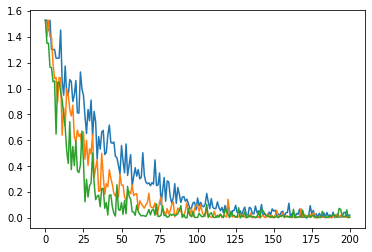

In [7]:
def MSE_td_lambda(array):
    error = array - np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 0])
    error = error**2
    return np.sum(error)

zerolist = []
halflist = []
ninelist = []

for epis in range(201):
    val1, EV = td_lambda(0.05, 1, 0, epis)
    zerolist.append(MSE_td_lambda(val1))
    
for epis in range(201):
    val1, EV = td_lambda(0.05, 1, 0.5, epis)
    halflist.append(MSE_td_lambda(val1))
    
for epis in range(201):
    val1, EV = td_lambda(0.05, 1, 0.9, epis)
    ninelist.append(MSE_td_lambda(val1))

plt.plot(zerolist)
plt.plot(halflist)
plt.plot(ninelist)

# Prediction Errors

Net als bij RW spelen voorspellingsfouten (prediction errors; PE) een grote rol in het TD leer proces. De dynamiek van de prediction errors is bij TD heel specifiek en ze veranderen niet alleen in grote, maar ook wanneer ze plaatsvinden. De prediction error speelde al een rol in de vorige TD functies maar in deze opdracht kijken we er in meer detail naar:

$$PE = [r_{t+1} + \gamma V(s_{t+1}) – V(s_t)]$$


### Woestijn wandeling

We gaan de dynamiek van de prediction error in kaart brengen voor het volgende Markov Reward Process (*MRP*). Dit keer loopt de robot door de woestijn, daar komt er telkens op onverwachte momenten een groene robot voorbijvliegen (*S1*). Telkens als de groene robot voorbijvliegt gooit hij een muntje naar beneden. Het duurt precies 4 seconden voor dat het muntje in de handen van de blauwe robot valt (*S5*). Zodra hij het muntje opgevangen heeft loopt hij door. __Het muntje is 10 punten waard__. 

![](desert_walk.png)

![](desert_walk_states.png)

Pas de vorige `td_zero` functie aan en schrijf een nieuwe functie `td_zero_coin` voor deze *MRP*. Zorg hierbij dat de prediction errors $PE$ ook worden opgeslagen en output zijn van de fucntie, samen met lijst values $V$. 

Denk eraan dat de eerste prediction error hoort bij het onverwachts voorbijvliegen van de groene robot op *S1*, daarvoor is de robot altijd in state zero (*S0*) en die heeft *altijd* verwachte waarde 0; de robot loopt door woestijn en verwacht dat er nooit iets gaat gebeuren (dit moet je expliciet in je functie opnemen). Zorg dat de output van de functie een lijst is van states $V$ en een lijst van $PE$ (een lijst per episode). 

$$PE = [R_{1} + \gamma V(S1_{1}) – V(S0_0)]$$

Gebruik de nieuwe `td_zero_coin` functie nu om het leren te simuleren van een robot met $\alpha = 0.1$ en $\gamma = 1$.

### Q4.a  (8 punten)

Plot de $V$ van elke staat na 1 leer episode (een keer voorbijvliegen van de robot), voeg ook de $PE$s toe aan de grafiek. Gebruik een [barplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) voor de $PE$s, en voeg dan $V$ als een normale lijn.


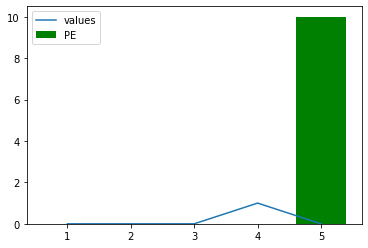

In [8]:
def td_zero_coin(alpha, gamma, episodes, prob=1.0, coins=999999999):
    values = np.zeros((5))
    PElist = []
    for ep in range(episodes):
        PE = []
        index = 0
        PE.append(gamma*values[0])
        while not index is 4:
            nextindex = index + 1
            flip = np.random.uniform(0, 1)
            if nextindex == 4 and ep < coins and flip < prob:
                reward = 10
            else:
                reward = 0
            delta = reward + gamma*values[nextindex] - values[index]
            PE.append(delta)
            values[index] += alpha * delta
            index = nextindex
        PElist.append(PE)
    return values, PElist

values, PElist = td_zero_coin(0.1, 1, 1)

plt.plot([1, 2, 3, 4, 5], values, label='values')
plt.bar([1, 2, 3, 4, 5], PElist[-1], label='PE', color='g')
plt.legend()
plt.show()

### Q4.b  (7 punten)

Wat is de waarde van $V$ van staat 1 en staat 4? Waarom?

De waarde van V in staat 1 is nog 0, omdat die staat nog niet is bijgewerkt. In staat 4 is de waarde van V 1, omdat de reward 10 is en er een alpha is gegeven van 0.1.

### Q4.c  (7 punten)

De eerst volgende keer dat de groen robot voorbij vliegt, wat zal dan de eerste reactie van de robot zijn?

Er zal geen reactie zijn op dit moment, omdat de robot nog geen waarde voor V heeft bij de eerste staat.

### Q4.d  (7 punten)

Beschrijf en plot de waardes van $V$ en de prediction errors na 10 en 100 episodes. Leg uit wat er gebeurd. Waarom blijft $V(S_5)$ $0$?


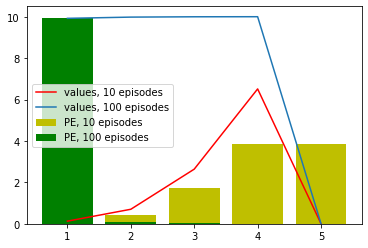

In [9]:
values1, PElist1 = td_zero_coin(0.1, 1, 10)
values2, PElist2 = td_zero_coin(0.1, 1, 100)

plt.plot([1, 2, 3, 4, 5], values1, label='values, 10 episodes', color='r')
plt.bar([1, 2, 3, 4, 5], PElist1[-1], label='PE, 10 episodes', color='y')

plt.plot([1, 2, 3, 4, 5], values2, label='values, 100 episodes')
plt.bar([1, 2, 3, 4, 5], PElist2[-1], label='PE, 100 episodes', color='g')
plt.legend()
plt.show()

Je ziet dat de prediction error langzamerhand naar S1 verschuift, nadat de robot 100 episodes heeft meegemaakt waar de voorbijvliegende robot steeds op S5 een munt draagt heeft de robot zijn verwachtingen zodanig ingesteld dat hij eigenlijk altijd zeker weet wat er gaat gebeuren (mits het experiment niet verandert). S5 blijft 0 omdat de robot geen verdere beloningen meer verwacht nadat hij die al heeft gekregen.

### Q5.a  (7 punten)

Wat gebeurt er als er na 100 episodes de robot wel weer voorbijvliegt maar nu geen muntje naar beneden gooit? Laat dit ook zien in een grafiek.  

Een zelfde soort patroon is ook gemeten in het brein door het meten van bepaalde neuronen. Welke neuronen waren dit? Welke neurotransmitter maken deze aan? Vindt de illustratie van deze signalen en beschrijf ook hoe deze het onverwachte uitblijven van een beloning coderen, hoe verschild dat?

Je kunt hiervoor een nieuwe versie van `td_zero_coin` maken, of je bestaande `td_zero_coin` functie uitbreiden met [default value arguments](https://docs.python.org/3.7/tutorial/controlflow.html#default-argument-values), zodat je code voor *Q4* blijft werken maar je de extra argument voor de optie(s) uit *Q5* kunt gebruiken.


<BarContainer object of 5 artists>

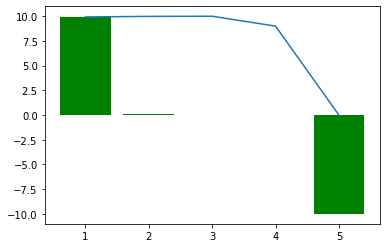

In [10]:
values100, PE100 = td_zero_coin(0.1, 1, 101, coins=100)

plt.plot([1, 2, 3, 4, 5], values100, label='values, no coin')
plt.bar([1, 2, 3, 4, 5], PE100[-1], label='PE, no coin', color='g')

Eerst zien we in de grafiek dat de robot een hoge activatie heeft wanneer hij de groene robot ziet. Dit komt omdat hij dit associeert met veel punten. Echter, wanneer blijkt dat hij geen reward krijgt deze keer is zijn prediction van punten 10 te hoo, dus zal de PE -10 zijn. Ditzelfde patroon van activatie aan het begin van het zien van de groene robot zien wij ook terug in de hoeveelheid dopamine die werd afgegeven in de hersenstam. Hoewel er in het brein geen negatieve stroompjes kunnen lopen, zien we in het brein wel een daling van de activatie.

### Q5.b  (6 punten)

Noem twee simpele aanpassingen aan het model die ervoor kunnen zorgen dat de robot sneller leert. 

De alpha (learning rate) hoger maken

Net als bij td_lambda rekening houden met de stappen die hij voor de laatste stap heeft genomen en deze ook bijwerken zodra hij bij de reward is gekomen.

### Q5.c  (7 punten)

Stel je nu voor dat de groene robot maar de helft van de tijd (met 50% kans) een muntje naar beneden gooit. Hoe ziet het leren er dan uit. Plot de PE en V grafiek na 100 episodes, let op de absolute waarde van de PE. (run de functie een paar keer om te zien wat er gebeurd als de laatste trial een muntje valt of juist niet).

Ook hiervoor geldt dat je een nieuwe versie van `td_zero_coin` zou kunnen schrijven of extra argument zou kunnen toevoegen. Als je dergelijke extra opties gaat combineren, is het ook nuttig om te kijken naar [keyword arguments](https://docs.python.org/3.7/tutorial/controlflow.html#keyword-arguments)

<BarContainer object of 5 artists>

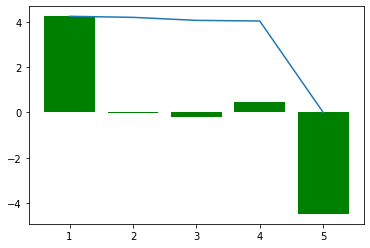

In [11]:
values100, PE100 = td_zero_coin(0.1, 1, 100, prob=0.5)

plt.plot([1, 2, 3, 4, 5], values100, label='values, no coin')
plt.bar([1, 2, 3, 4, 5], PE100[-1], label='PE, no coin', color='g')

De reward van een muntje vangen is 10, door de groene robot elke keer maar met een kans van 50% de munt te laten gooien krijg je dus op een gegeven moment twee (grote) PE-waarden, eentje rond de 5 en een rond -5. Dit zie je omdat elke keer dat de robot bij een state komt waar hij misschien een munt zou krijgen en die wel krijgt hij een positieve reactie heeft (en hier hoort dus ook een positieve PE bij) maar als hij geen munt krijgt zie je deze reacties negatief terug.